<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9

## Conceptual

### Question 1

This problem involves hyperplanes in two dimensions.

> (a) Sketch the hyperplane $1 + 3X_1 − X_2 = 0$. Indicate the set of points for which $1 + 3X_1 − X_2 > 0$, as well as the set of points for which $1 + 3X_1 − X_2 < 0$.

> (b) On the same plot, sketch the hyperplane $−2 + X_1 + 2X_2 = 0$. Indicate the set of points for which $−2 + X_1 + 2X_2 > 0$, as well as the set of points for which $−2 + X_1 + 2X_2 < 0$.

#### Answer

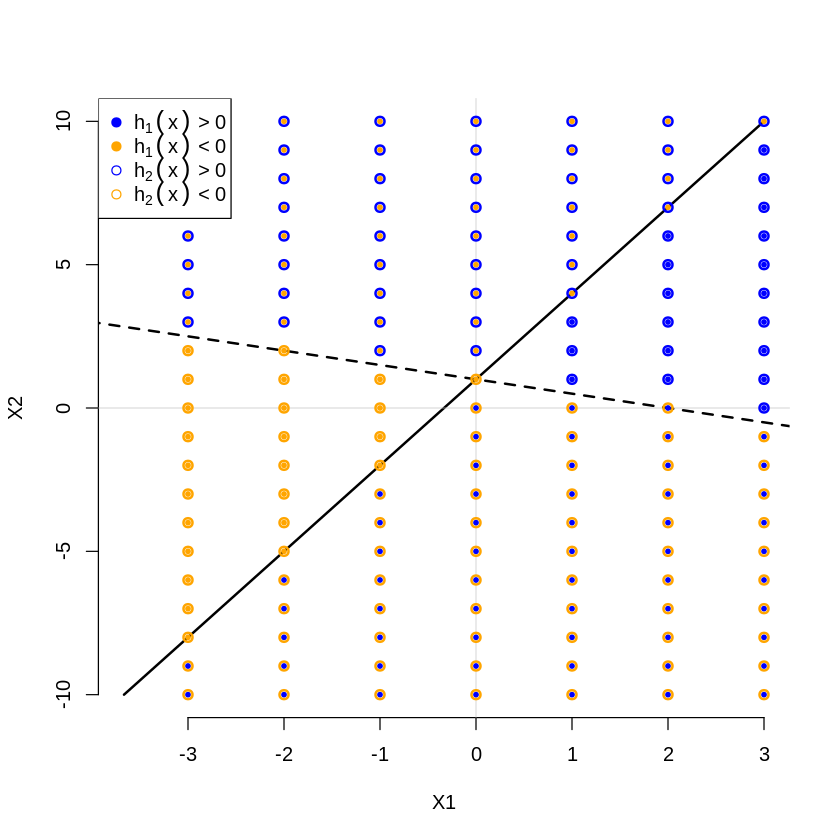

In [ ]:
# Hyperplane 1
hp1_x2 <- seq(-10,10,1)
hp1_x1 <- (hp1_x2-1)/3
hp1 <- 1 + 3*hp1_x1 - hp1_x2
plot(hp1_x2 ~ hp1_x1, type="l", lwd=2, bty="n", col="black", lty=1, xlab="X1", ylab="X2")
abline(h=0, lwd=0.5, col="grey"); abline(v=0, lwd=0.5, col="grey")

# Hyperplane 2
hp2_x1 <- seq(-10,10,1)
hp2_x2 <- (2-hp2_x1)/2
hp2 <- -2 + hp2_x1 + 2*hp2_x2
lines(hp2_x2 ~ hp2_x1, lwd=2, col="black", lty=2)

# Add grid of points
grid.seq <- seq(-10, 10, 1)
G <- expand.grid(x1 = grid.seq, x2 = grid.seq)
G$hp1 <- with(G, 1 + 3 * x1 - x2)
G$hp2 <- with(G, -2 + x1 + 2 * x2)
G$col1 <- ifelse(G$hp1 > 0, "blue", "orange")
G$col2 <- ifelse(G$hp2 > 0, "blue", "orange")

points(G$x1, G$x2,
       pch = 19,
       col = G$col1,
       cex = 0.5)
points(G$x1, G$x2,
       pch = 1,
       col = G$col2,
       cex = 1, lwd=2)

# Legend
legend("topleft",
       legend = c(expression(h[1](x) > 0*phantom(0)),
                  expression(h[1](x) < 0*phantom(0)),
                  expression(h[2](x) > 0*phantom(0)),
                  expression(h[2](x) < 0*phantom(0))),
       pch   = c(19, 19, 1, 1),
       col   = c("blue", "orange", "blue", "orange"),
       bty="o", bg="white")

### Question 2

We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $β_0 + β_1 X_1 + β_2 X_2 = 0$. We now investigate a non-linear decision boundary.

> (a) Sketch the curve
$$(1 + X_1)^2 + (2 − X_2)^2 = 4$$

> (b) On your sketch, indicate the set of points for which
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
as well as the set of points for which
$$(1 + X_1)^2 + (2 − X_2)^2 ≤ 4$$

> (c) Suppose that a classifier assigns an observation to the blue class if
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
and to the red class otherwise. To what class is the observation $(0, 0)$ classified? $(−1, 1)$? $(2, 2)$? $(3, 8)$?

> (d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

#### Answers to a-c

***Sketch the curve***
$$(1 + X_1)^2 + (2 − X_2)^2 = 4$$

\

***On your sketch, indicate the set of points for which***
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
***as well as the set of points for which***
$$(1 + X_1)^2 + (2 − X_2)^2 ≤ 4$$

\

***Suppose that a classifier assigns an observation to the blue class if***
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
***and to the red class otherwise. To what class is the observation $(0, 0)$ classified? $(−1, 1)$? $(2, 2)$? $(3, 8)$?***

\

This is a circle
$$(X_1-h)^2 + (X_2-v)^2 = r^2$$
with radius = $r=\sqrt{4}=2$, centered at $(h=-1, v=2)$.  We can plot this like

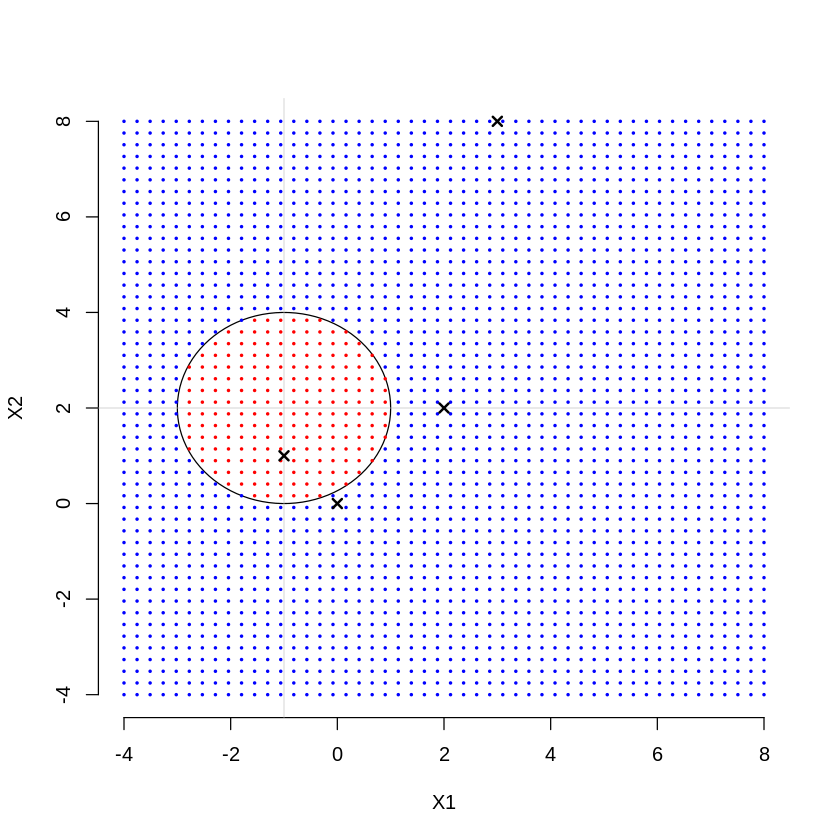

In [ ]:
# Define Circle
theta <- seq(0, 2*pi, length.out=100)
radius <- sqrt(4)
X1 <- -1 + 2*cos(theta)
X2 <- 2 + 2*sin(theta)

# Plot circle
plot(X2 ~ X1, type="l", xlim=c(-4,8), ylim=c(-4,8), bty="n")
abline(v=-1, lwd=0.5, col="grey"); abline(h=2, lwd=0.5, col="grey")

# Grid of points
grid.seq <- seq(from=-4, to=8, length.out=50)
G <- expand.grid(x1 = grid.seq, x2 = grid.seq)
G$col <- ifelse((1+G$x1)^2 + (2-G$x2)^2 > 4, "blue", "red")


points(G$x2 ~ G$x1,
       pch = 19,
       cex = 0.25,
       col=G$col)

points(0,0, pch=4, lwd=2)
points(-1,1, pch=4, lwd=2)
points(2,2, pch=4, lwd=2)
points(3,8, pch=4, lwd=2)

#### Answer to d

***Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.***

Let us expand the inital expression:

$$\begin{align}
(1 + X_1)^2 + (2 − X_2)^2 = 4 \\
= (1+X_1)(1+X_1) + (2-X_2)(2-X_2) = 4 \\
= (1+2X_1+X_1^2)+(4-4X_2+X_2^2)=4 \\
= 5 + 2X_1 - 4X_2 + X_1^2 + X_2^2 = 4 \\
= 1 + 2X_1 - 4X_2 + X_1^2 + X_2^2 = 0 \\
\end{align}$$

Is this linear?  To determine, we need a definition for "linear".  Here, linear does NOT refer to a straight line.  Instead, it refers to a function comprised purely from addition...which entails subtraction (negative addition) and multiplication (adding many times).  Here, our variables are all multipled by some coefficent (1, 2, or 4), and these terms are added together.  So yes, this is linear.

### Question 3

Here we explore the maximal margin classifier on a toy data set.

> (a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label.

> > |Obs.|$X_1$|$X_2$|$Y$|
|----|-----|-----|---|
|1   |3    |4    |Red|
|2   |2    |2    |Red|
|3   |4    |4    |Red|
|4   |1    |4    |Red|
|5   |2    |1    |Blue|
|6   |4    |3    |Blue|
|7   |4    |1    |Blue|

> > Sketch the observations.

> (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))

> (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $β_0 + β_1 X_1 + β_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $β_0$, $β_1$, and $β_2$.

> (d) On your sketch, indicate the margin for the maximal margin hyperplane.

> (e) Indicate the support vectors for the maximal margin classifier.

> (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

> (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

> (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

#### Answer to a

***We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label.***

> |Obs.|$X_1$|$X_2$|$Y$|
|----|-----|-----|---|
|1   |3    |4    |Red|
|2   |2    |2    |Red|
|3   |4    |4    |Red|
|4   |1    |4    |Red|
|5   |2    |1    |Blue|
|6   |4    |3    |Blue|
|7   |4    |1    |Blue|

***Sketch the observations.***

In [ ]:
X1 <- c(3,2,4,1,2,4,4)
X2 <- c(4,2,4,4,1,3,1)
Y <- as.factor(c("R","R","R","R","B","B","B"))

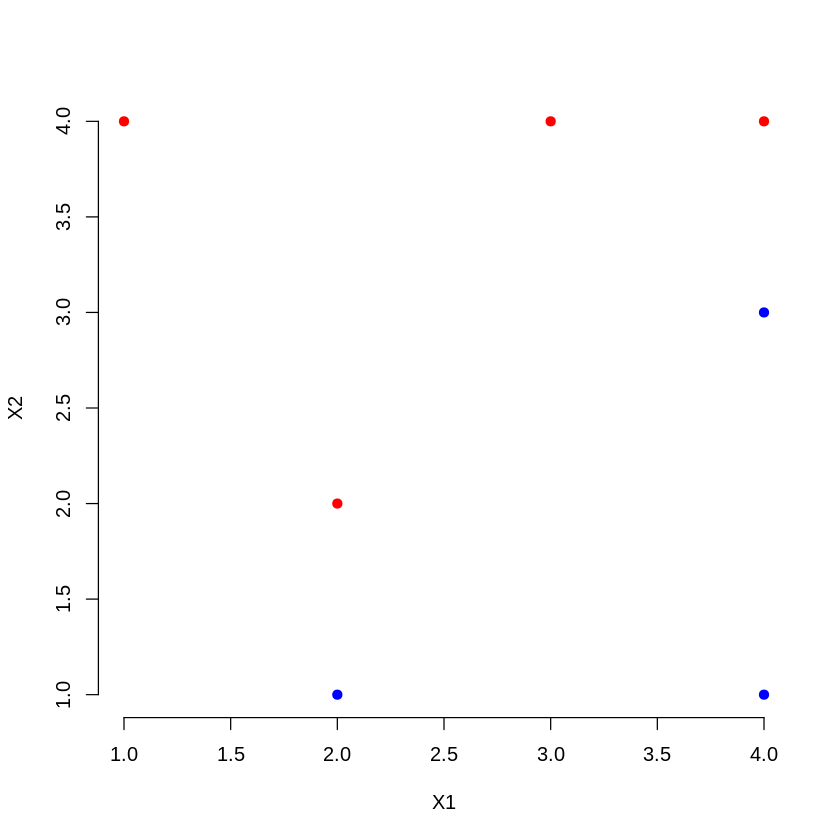

In [ ]:
plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")

#### Answer to b

***Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))***

First, we need to find the "support vectors", which will be the red and blue points that are closest to each other.  The formula for distance is

$$\text{distance} = \sqrt{(X_1^{red} - X_1^{blue})^2 + (X_2^{red} - X_2^{blue})^2}$$


In [ ]:
RedPts <- cbind(X1=X1[Y=="R"], X2=X2[Y=="R"])
BluePts <- cbind(X1=X1[Y=="B"], X2=X2[Y=="B"])

distances <- sqrt(outer(RedPts[,1], BluePts[,1], "-")^2 +
                  outer(RedPts[,2], BluePts[,2], "-")^2)
rownames(distances) <- paste0("Red", 1:4)
colnames(distances) <- paste0("Blue", 1:3)

distances
(whichMin_distances <- distances == apply(distances, 1, min)[row(distances)])

support_vectors <- which(distances == min(distances), arr.ind = TRUE)
rownames(support_vectors) <- NULL
colnames(support_vectors) <- c("Red", "Blue")
support_vectors

(Red_support_vector1 <- RedPts[support_vectors[1,"Red"],])
(Blue_support_vector1 <- BluePts[support_vectors[1,"Blue"],])
(Red_support_vector2 <- RedPts[support_vectors[2,"Red"],])
(Blue_support_vector2 <- BluePts[support_vectors[2,"Blue"],])

,Blue1,Blue2,Blue3
Red1,3.162278,1.414214,3.162278
Red2,1.000000,2.236068,2.236068
Red3,3.605551,1.000000,3.000000
Red4,3.162278,3.162278,4.242641


,Blue1,Blue2,Blue3
Red1,FALSE,TRUE,FALSE
Red2,TRUE,FALSE,FALSE
Red3,FALSE,TRUE,FALSE
Red4,TRUE,TRUE,FALSE


Red,Blue
2,1
3,2


X1 X2 
 2  2

X1 X2 
 2  1

X1 X2 
 4  4

X1 X2 
 4  3

So we have 2 pairs support vectors.  We need to thread a line between these these pairs.  Let's highlight these.

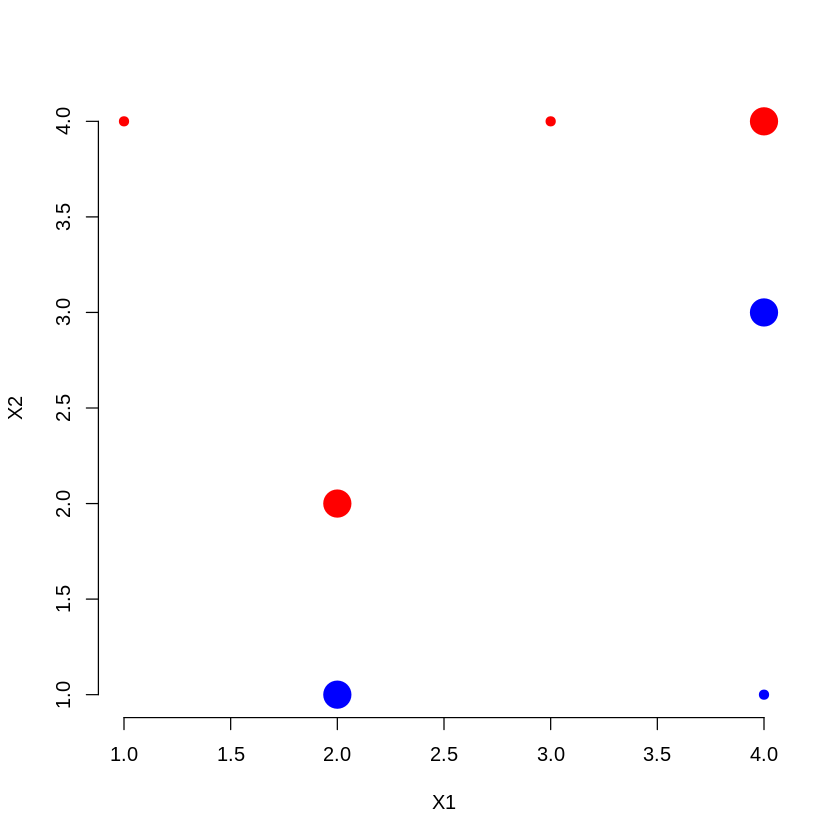

In [ ]:
plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")
points(Red_support_vector1[2] ~ Red_support_vector1[1], col="red", pch=19, cex=3)
points(Red_support_vector2[2] ~ Red_support_vector2[1], col="red", pch=19, cex=3)
points(Blue_support_vector1[2] ~ Blue_support_vector1[1], col="blue", pch=19, cex=3)
points(Blue_support_vector2[2] ~ Blue_support_vector2[1], col="blue", pch=19, cex=3)

The best line we can use is one that evenly splits the distance.  What is that distance?

In [ ]:
min(distances)

[1] 1

So evenly spliting this would be

In [ ]:
min(distances) / 2

[1] 0.5

So we need a line of form $y = \alpha + \beta x$ to traverse the points $(2, 1+0.5) = (2, 2-0.5) = (2, 1.5)$ and $(4, 3+0.5) = (4, 4-0.5) = (4, 3.5)$.

We can find the slope of that line with
$$\text{slope} = \beta = \frac{\text{rise}}{\text{run}} = \frac{3.5-1.5}{4-2} = \frac{2}{2} = 1$$
and the intercept like
$$\text{intercept}=\alpha=y-\beta x = \text{ (plug in one of the two available points) } 1.5 - 1(2) = -0.5$$

So now we can draw our line
$$\begin{align}
X_2 &=\beta_0 + \beta_1(X_1) \\
\rightarrow 0 &= -0.5 + 1(X_1) - X_2 \\
&= -0.5 - X_2 + X_1
\end{align}$$

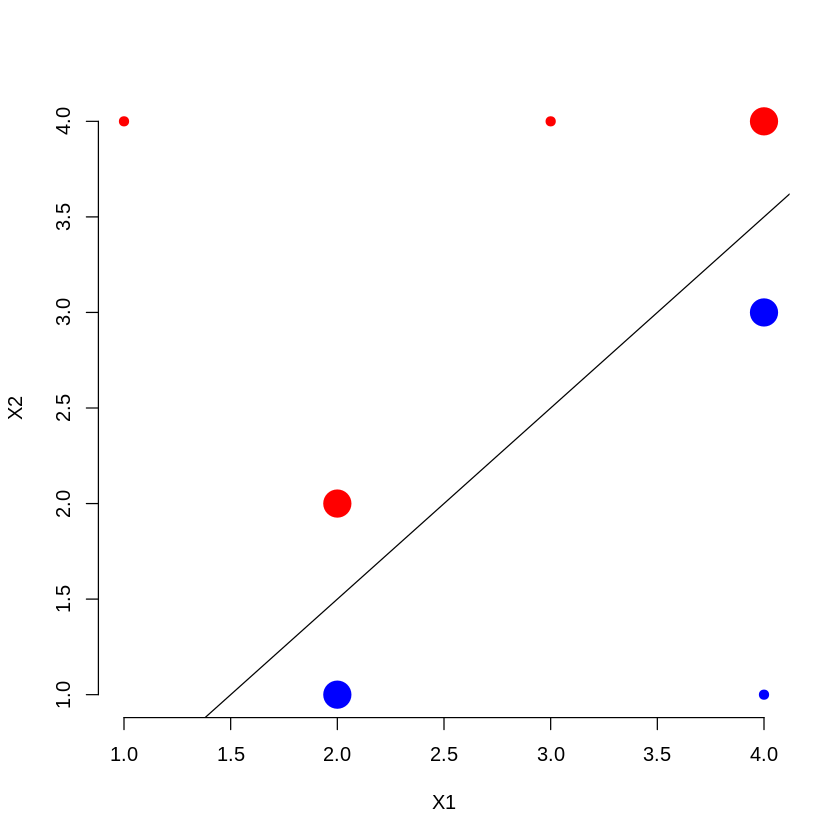

In [ ]:
plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")
points(Red_support_vector1[2] ~ Red_support_vector1[1], col="red", pch=19, cex=3)
points(Red_support_vector2[2] ~ Red_support_vector2[1], col="red", pch=19, cex=3)
points(Blue_support_vector1[2] ~ Blue_support_vector1[1], col="blue", pch=19, cex=3)
points(Blue_support_vector2[2] ~ Blue_support_vector2[1], col="blue", pch=19, cex=3)

abline(a=-0.5, b=1)

#### Answer to c

***Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $β_0 + β_1 X_1 + β_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $β_0$, $β_1$, and $β_2$.***

Let's find the value of each row in our data, and look for the rule:

In [ ]:
X1 <- c(3,2,4,1,2,4,4)
X2 <- c(4,2,4,4,1,3,1)
Y <- as.factor(c("R","R","R","R","B","B","B"))
Rule <- (-0.5 - X2 + X1) > 0

data.frame(X1, X2, Y, Rule)

X1,X2,Y,Rule
<dbl>,<dbl>,<fct>,<lgl>
3,4,R,FALSE
2,2,R,FALSE
4,4,R,FALSE
1,4,R,FALSE
2,1,B,TRUE
4,3,B,TRUE
4,1,B,TRUE


So $(-0.5 - X_2 + X1 > 0) \rightarrow \text{Blue, else Red}$

#### Answers to d,e

***On your sketch, indicate the margin for the maximal margin hyperplane.***

***Indicate the support vectors for the maximal margin classifier.***

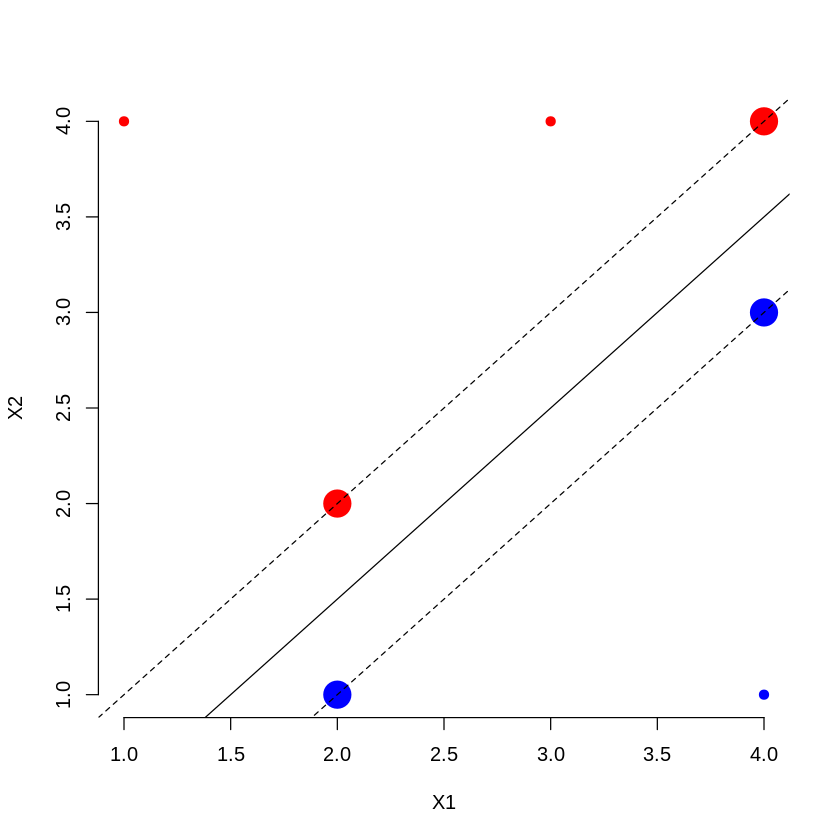

In [ ]:
plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")
points(Red_support_vector1[2] ~ Red_support_vector1[1], col="red", pch=19, cex=3)
points(Red_support_vector2[2] ~ Red_support_vector2[1], col="red", pch=19, cex=3)
points(Blue_support_vector1[2] ~ Blue_support_vector1[1], col="blue", pch=19, cex=3)
points(Blue_support_vector2[2] ~ Blue_support_vector2[1], col="blue", pch=19, cex=3)

abline(a=-0.5, b=1)

# Margins
# Add/subtract 0.5 to the dividing hyperplane
abline(a=-1, b=1, lty=2)
abline(a=0, b=1, lty=2)

#### Answer to f

***Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.***

The 7th datapoint is (4,1); it would not affect the hyperplane, as long as it did not move to within the existing margin, because it is not a support vector.

#### Answer to g

***Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.***

There are really infinite such hyperplanes; e.g., $-0.3 - X_2 + X_1$.

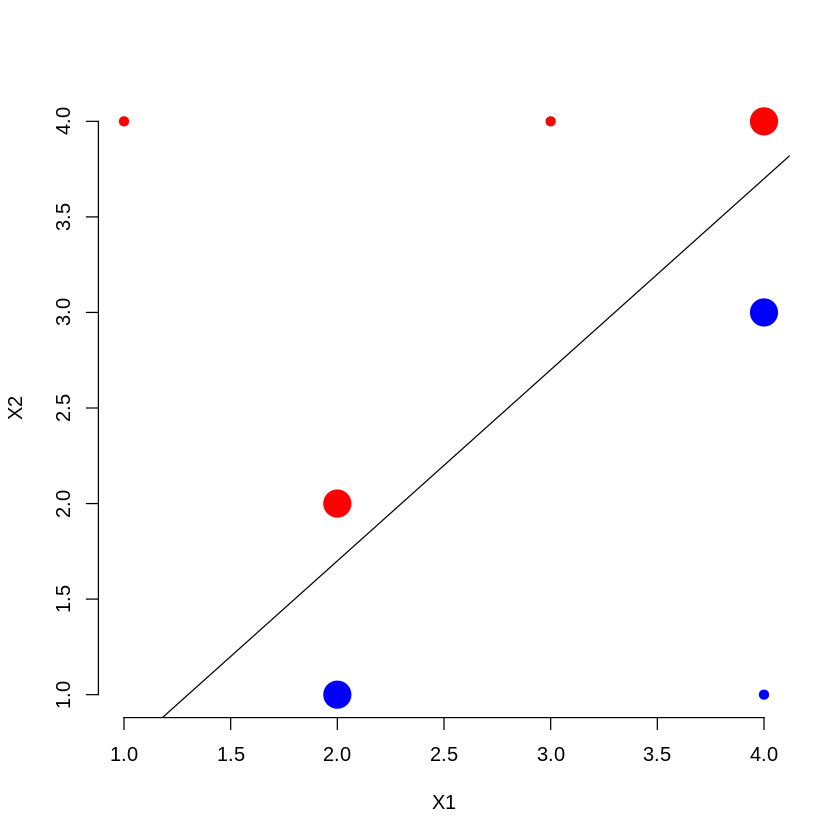

In [ ]:
plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")
points(Red_support_vector1[2] ~ Red_support_vector1[1], col="red", pch=19, cex=3)
points(Red_support_vector2[2] ~ Red_support_vector2[1], col="red", pch=19, cex=3)
points(Blue_support_vector1[2] ~ Blue_support_vector1[1], col="blue", pch=19, cex=3)
points(Blue_support_vector2[2] ~ Blue_support_vector2[1], col="blue", pch=19, cex=3)

abline(a=-0.3, b=1)

We can tell, although this hyperplane *does* separate the classes, it is not optimal because the margin is not even between classes.

#### Answer to h

***Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.***

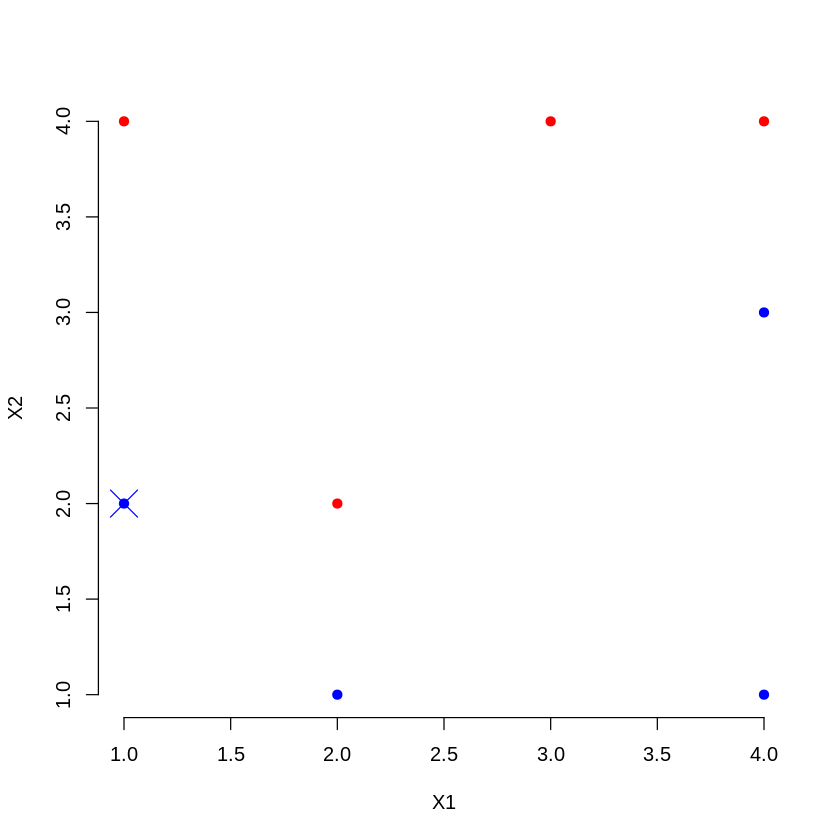

In [ ]:
X1[8] <- 1
X2[8] <- 2
Y[8] <- "B"

plot(X2 ~ X1,
     pch=19,
     cex=1,
     col=ifelse(Y=="R", "red", "blue"),
     bty="n")
points(X2[8] ~ X1[8], col="blue", pch=4, cex=3)

## Applied

### Question 4

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

#### Answer

##### Data

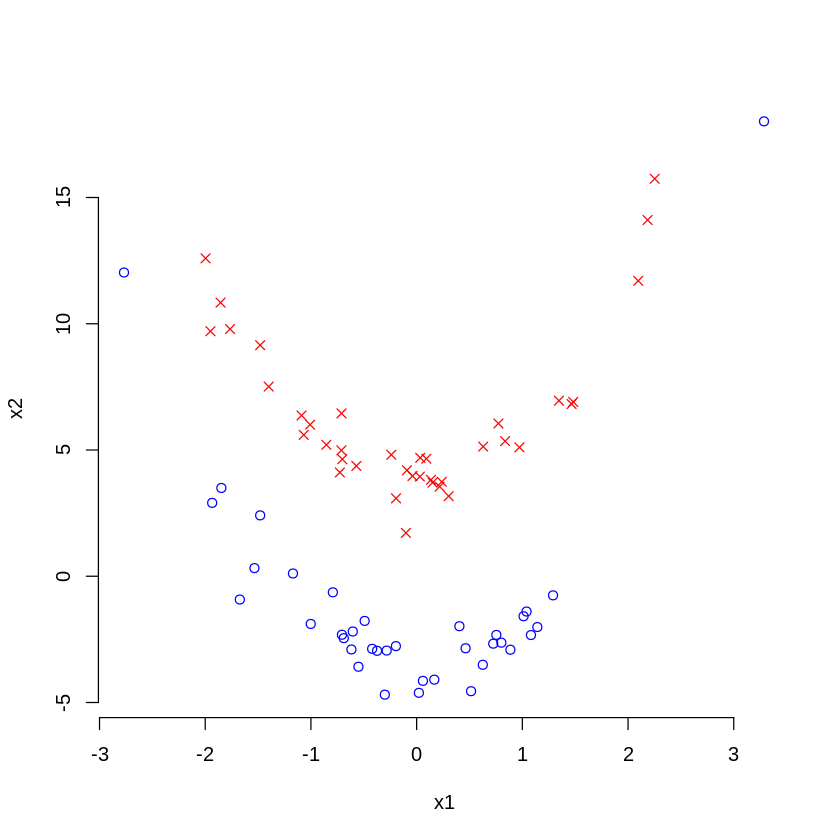

In [ ]:
x1a <- rnorm(50)
x2a <- 2*x1a^2 - 4 + rnorm(50)
x1b <- rnorm(50)
x2b <- 2*x1b^2 + 4 + rnorm(50)

x1 <- c(x1a, x1b)
x2 <- c(x2a, x2b)
y <- c(rep("Blue", 50), rep("Red", 50))
y <- factor(y)

d <- data.frame("x1"=x1, "x2"=x2, "y"=y)

train_p <- 0.75
train_n <- floor(train_p*length(y))
train_ind <- sample(1:length(y), train_n)
train_d <- d[train_ind,]
test_d <- d[-train_ind,]

plot(x2 ~ x1, data=train_d,
     col=ifelse(y=="Blue", "blue", "red"),
     pch=ifelse(y=="Blue", 1, 4),
     bty="n")

##### Linear

In [ ]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
linear_tune <- tune(svm, y~x2+x1, data=train_d, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 3, 10, 100)))
best_linear <- linear_tune$best.model

       truth
predict Blue Red
   Blue   34   0
   Red     3  38

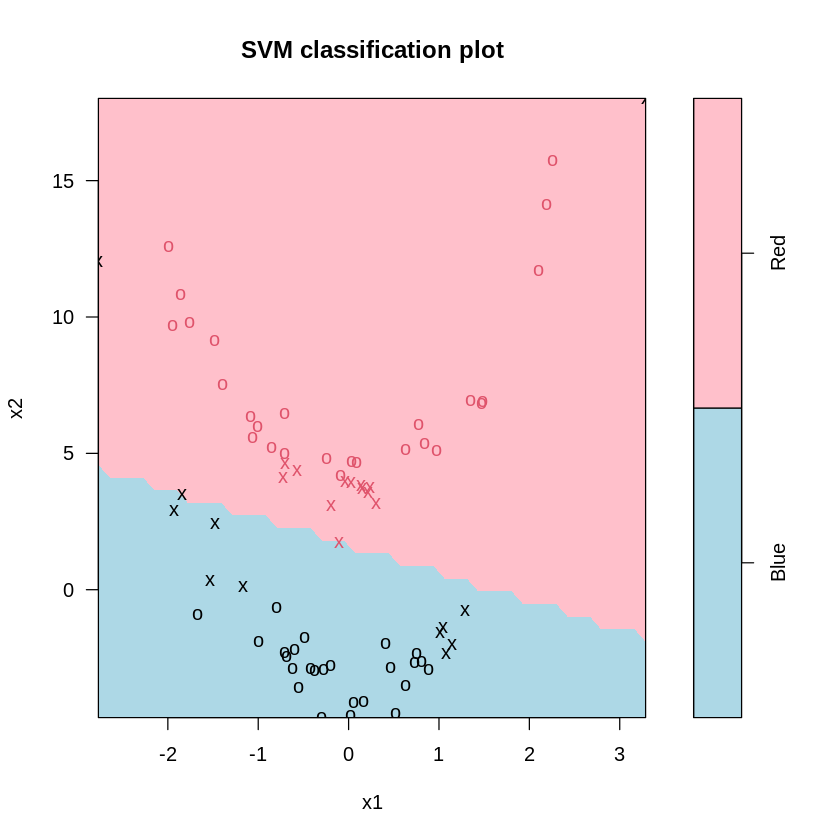

In [ ]:
linear_train_pred <- predict(best_linear, train_d)
table(predict=linear_train_pred, truth=train_d$y)
plot(best_linear, train_d, col=c("lightblue", "pink"))

       truth
predict Blue Red
   Blue   11   0
   Red     2  12

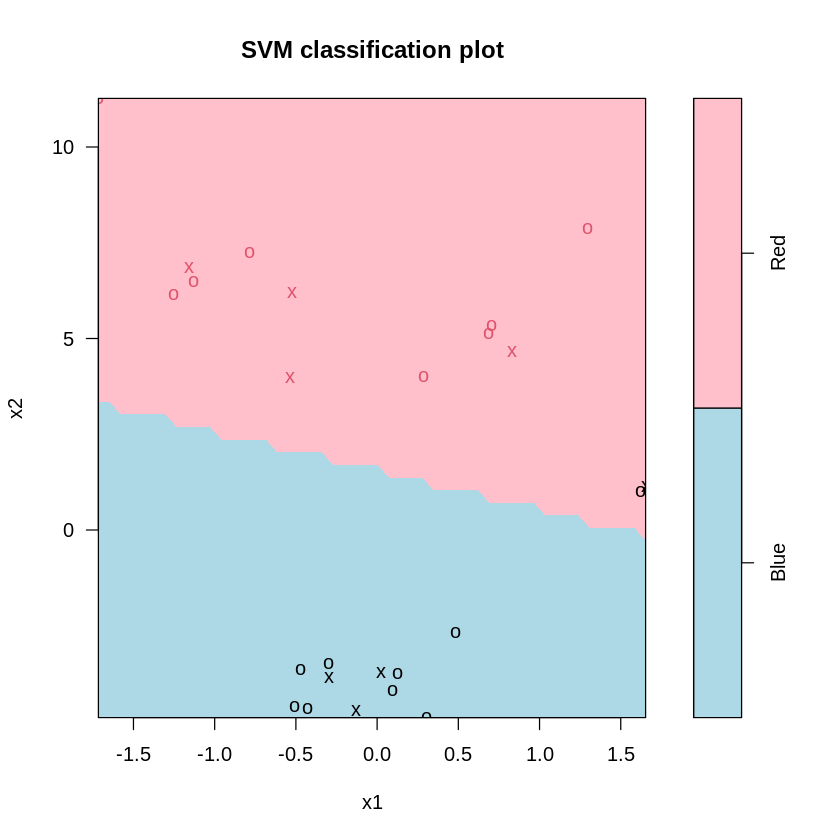

In [ ]:
linear_test_pred <- predict(best_linear, test_d)
table(predict=linear_test_pred, truth=test_d$y)
plot(best_linear, test_d, col=c("lightblue", "pink"))

##### Polynomial

In [ ]:
poly_tune <- tune(svm, y~x2+x1, data=train_d, kernel="polynomial",
                  ranges=list(cost=c(0.001, 0.01, 0.1, 1, 3, 10, 100),
                              degree=c(2,3,4,5,6)))
best_poly <- poly_tune$best.model

       truth
predict Blue Red
   Blue   30   1
   Red     7  37

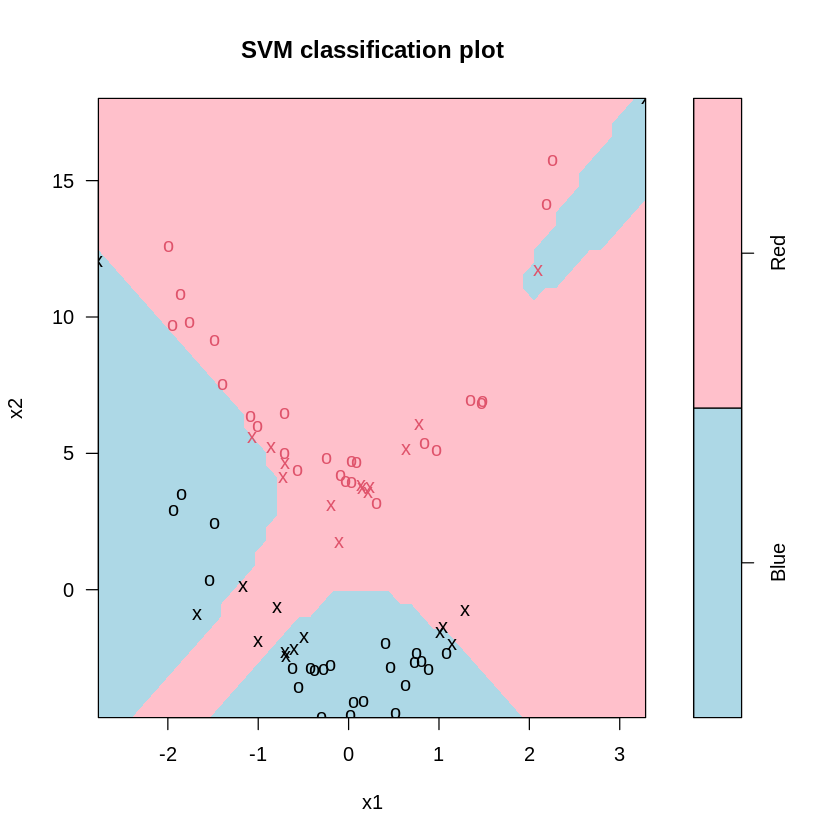

In [ ]:
poly_train_pred <- predict(best_poly, train_d)
table(predict=poly_train_pred, truth=train_d$y)
plot(best_poly, train_d, col=c("lightblue", "pink"))

       truth
predict Blue Red
   Blue   11   1
   Red     2  11

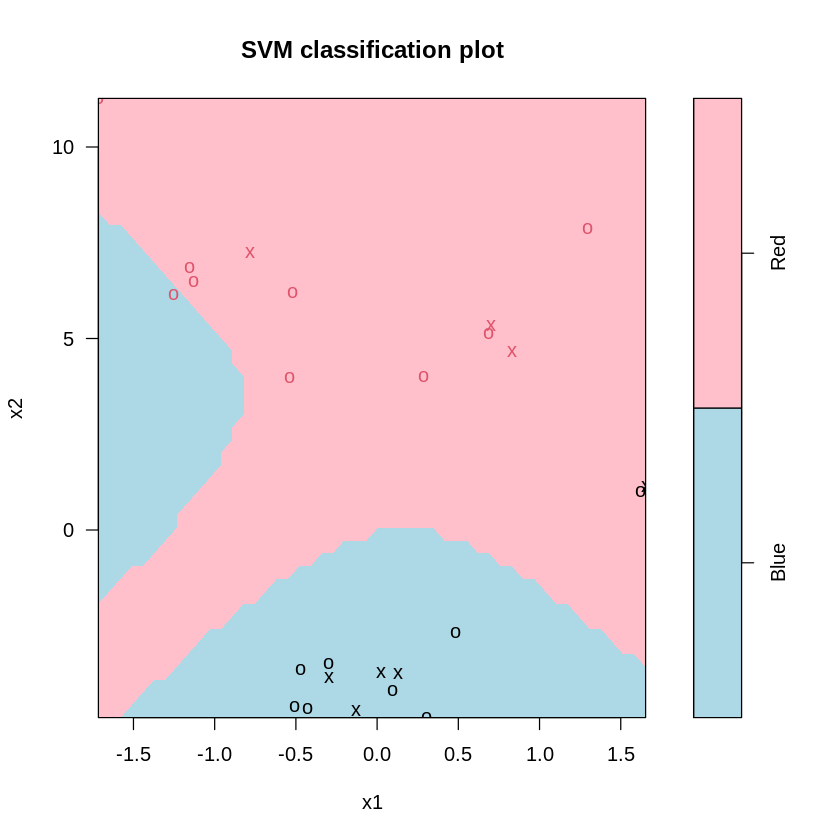

In [ ]:
poly_test_pred <- predict(best_poly, test_d)
table(predict=poly_test_pred, truth=test_d$y)
plot(best_poly, test_d, col=c("lightblue", "pink"))

##### Radial

In [ ]:
rad_tune <- tune(svm, y~x2+x1, data=train_d, kernel="radial",
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1, 3, 10, 100)),
                             gamma=c(0.5, 1, 2, 4, 8))
best_rad <- rad_tune$best.model

       truth
predict Blue Red
   Blue   36   0
   Red     1  38

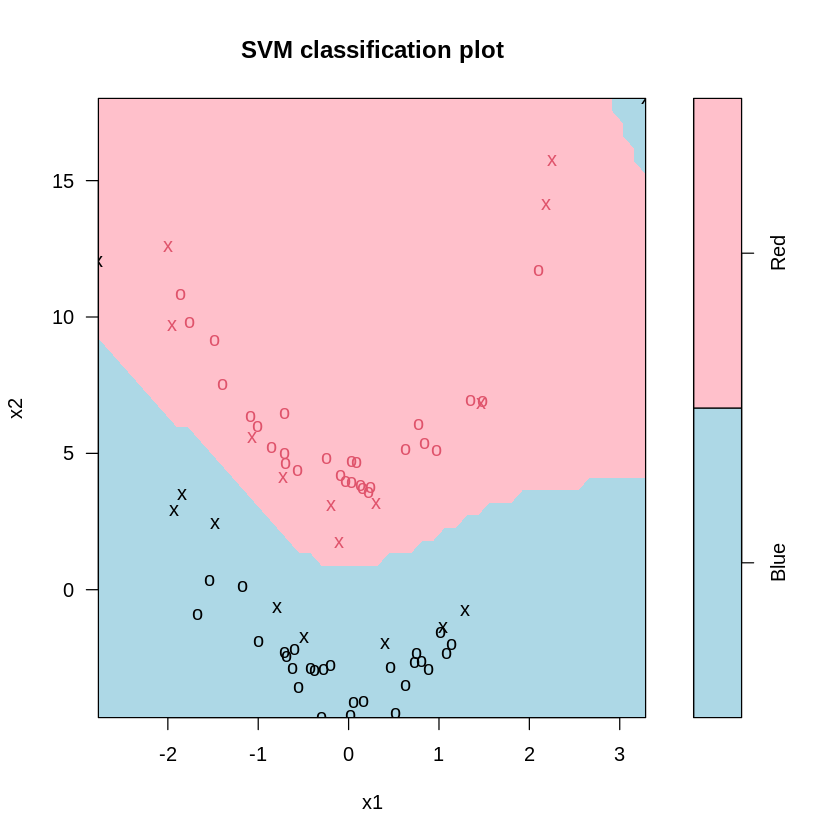

In [ ]:
rad_train_pred <- predict(best_rad, train_d)
table(predict=rad_train_pred, truth=train_d$y)
plot(best_rad, train_d, col=c("lightblue", "pink"))

       truth
predict Blue Red
   Blue   13   0
   Red     0  12

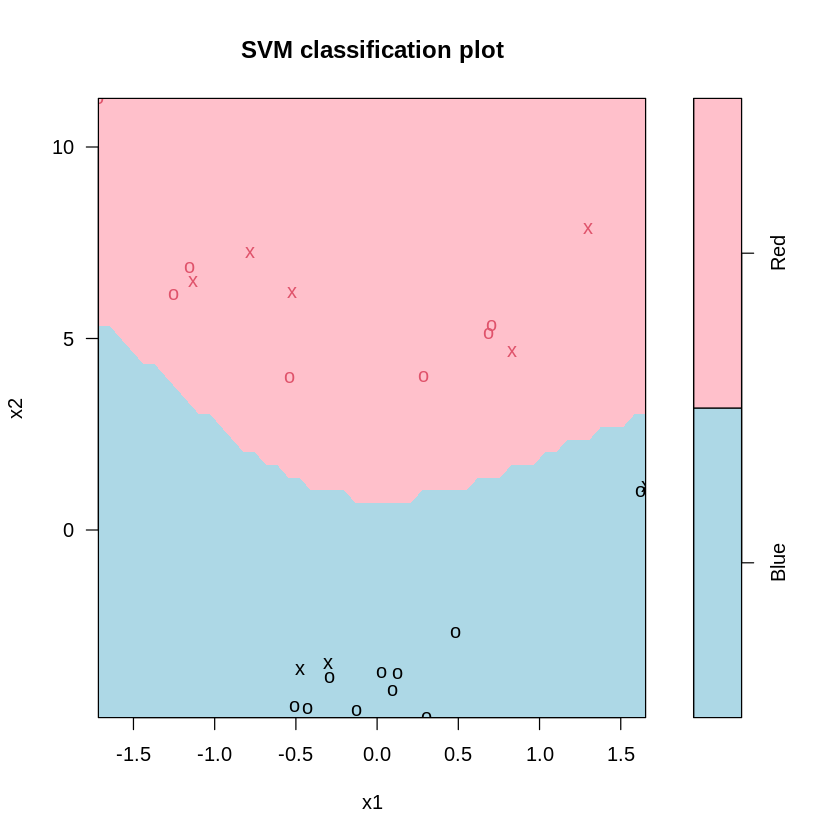

In [ ]:
rad_test_pred <- predict(best_rad, test_d)
table(predict=rad_test_pred, truth=test_d$y)
plot(best_rad, test_d, col=c("lightblue", "pink"))

##### Best

In [ ]:
table(predict=linear_test_pred, truth=test_d$y)
table(predict=poly_test_pred, truth=test_d$y)
table(predict=rad_test_pred, truth=test_d$y)

       truth
predict Blue Red
   Blue   11   0
   Red     2  12

       truth
predict Blue Red
   Blue   11   1
   Red     2  11

       truth
predict Blue Red
   Blue   13   0
   Red     0  12

### Question 5

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

> (a) Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

> ```
> x1 <- runif(500) - 0.5
> x2 <- runif(500) - 0.5
> y <- 1 * (x1^2 - x2^2 > 0)
```

> (b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.

> (c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

> (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

> (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X^2_1$, $X_1 \times X_2$, $\log(X_2)$, and so forth).

> (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

> (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

> (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

> (i) Comment on your results.

#### Answer to a

***Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:***

> ```
> x1 <- runif(500) - 0.5
> x2 <- runif(500) - 0.5
> y <- 1 * (x1^2 - x2^2 > 0)
```

In [ ]:
x1 <- runif(500) - 0.5
x2 <- runif(500) - 0.5
y <- 1 * (x1^2 - x2^2 > 0)

d <- data.frame(x1, x2, y)

#### Answer to b

***Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.***

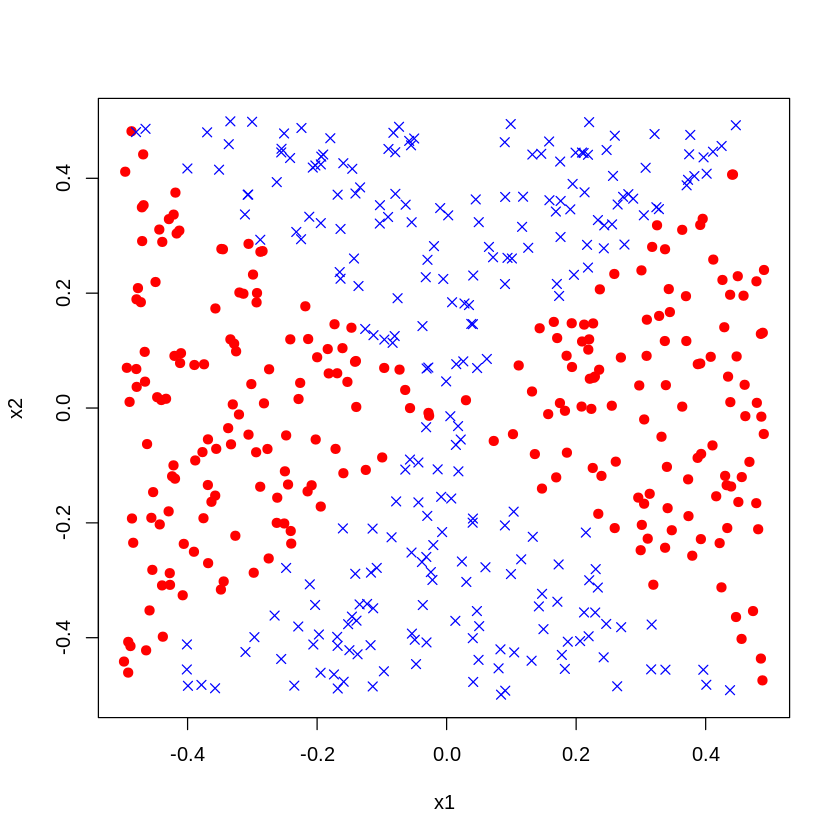

In [ ]:
plot(x2 ~ x1,
     col=ifelse(y==1, "red", "blue"),
     pch=ifelse(y==1, 19, 4))

#### Answer to c

***Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.***

In [ ]:
m_logisitc <- glm(y ~ x1+x2, family=binomial)

#### Answer to d

***Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.***

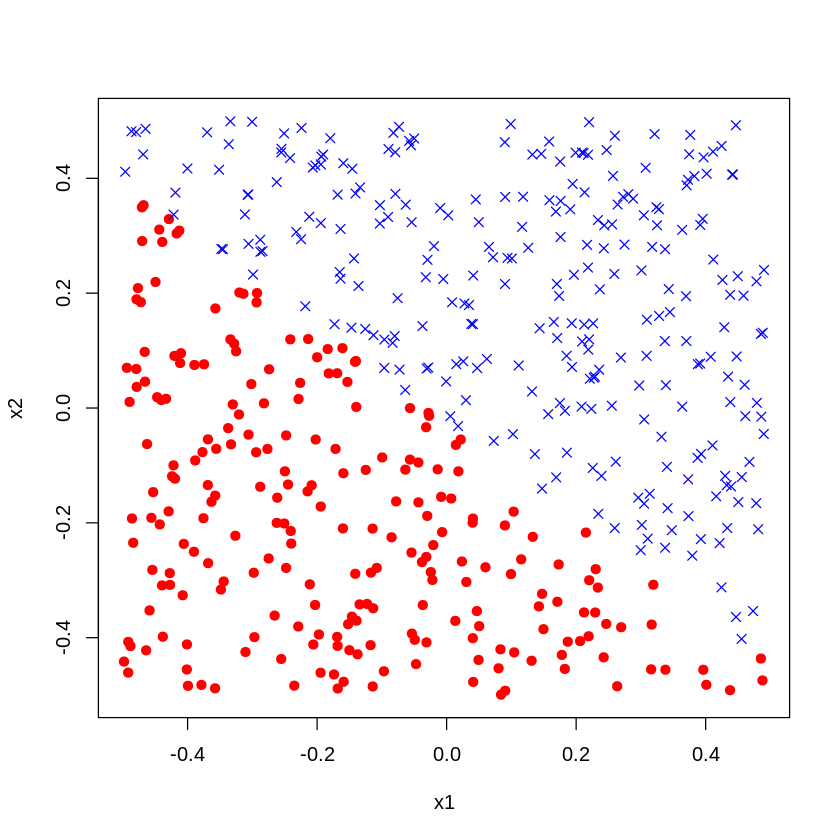

In [ ]:
m_logisitc_train_probs <- predict(m_logisitc, d, type="response")
m_logisitc_train_preds <- ifelse(m_logisitc_train_probs > 0.50, 1, 0)
plot(x2 ~ x1,
     col=ifelse(m_logisitc_train_preds==1, "red", "blue"),
     pch=ifelse(m_logisitc_train_preds==1, 19, 4))

#### Answer to e

***Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X^2_1$, $X_1 \times X_2$, $\log(X_2)$, and so forth).***

In [ ]:
m_logisitc.nl <- glm(y ~ x1*x2, family=binomial)

#### Answer to f

***Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.***

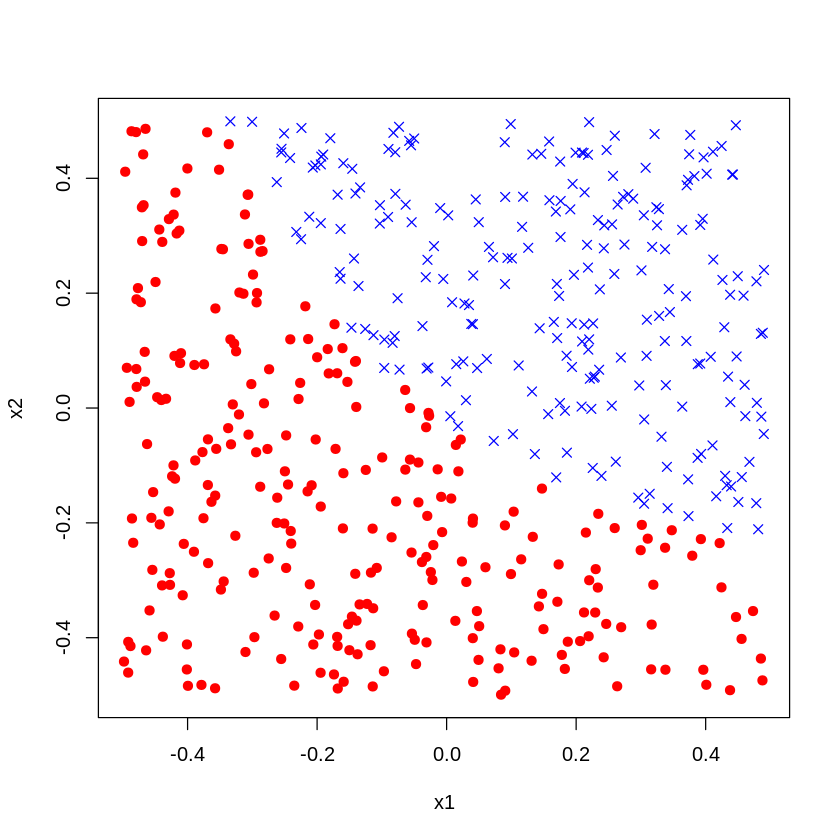

In [ ]:
m_logisitc_train_probs.nl <- predict(m_logisitc.nl, d, type="response")
m_logisitc_train_preds.nl <- ifelse(m_logisitc_train_probs.nl > 0.50, 1, 0)
plot(x2 ~ x1,
     col=ifelse(m_logisitc_train_preds.nl==1, "red", "blue"),
     pch=ifelse(m_logisitc_train_preds.nl==1, 19, 4))

#### Answer to g

***Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.***

In [ ]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




Just for kicks, let's do both a linear and non-linear classifier.

In [ ]:
m_svm.lin <- tune(svm, as.factor(y)~x2+x1,
                  data=d,
                  kernel="linear",
                  ranges=list(cost=c(0.001, 0.01, 0.1, 1, 3, 10, 100)))
m_bestSVM.lin <- m_svm.lin$best.model

m_svm.rad <- tune(svm, as.factor(y)~x2+x1,
                  data=d,
                  kernel="radial",
                  ranges=list(cost=c(0.001, 0.01, 0.1, 1, 3, 10, 100),
                              gamma=c(0.5, 1, 2, 4, 8)))
m_bestSVM.rad <- m_svm.rad$best.model

       truth
predict   0   1
      0 137 103
      1 115 145

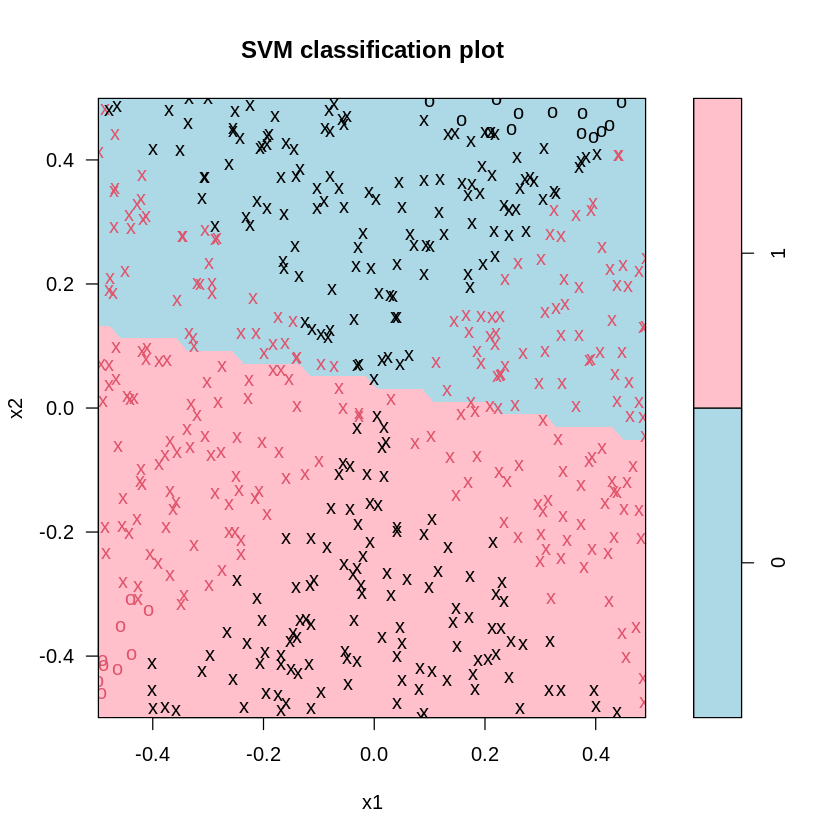

In [ ]:
m_svm.lin_pred <- predict(m_bestSVM.lin, d)
table(predict=m_svm.lin_pred, truth=d$y)
plot(m_bestSVM.lin, d, col=c("lightblue", "pink"))

       truth
predict   0   1
      0 252   5
      1   0 243

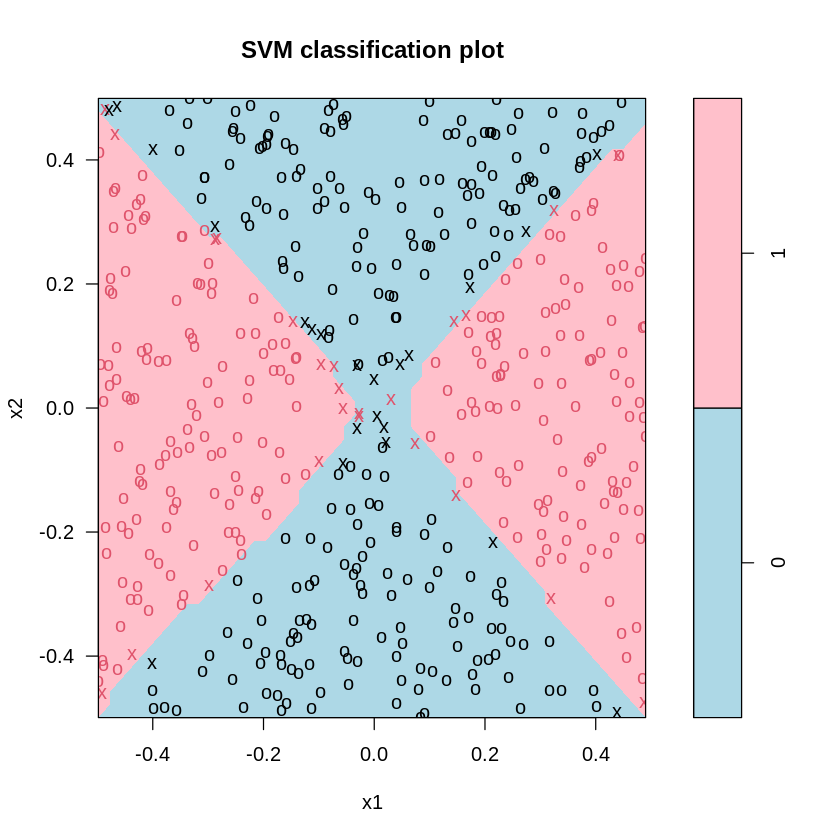

In [ ]:
m_svm.rad_pred <- predict(m_bestSVM.rad, d)
table(predict=m_svm.rad_pred, truth=d$y)
plot(m_bestSVM.rad, d, col=c("lightblue", "pink"))

#### Answer to h

***Comment on your results.***

### Question 6

At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of `cost` that misclassifies a couple of training observations may perform better on test data than one with a huge value of `cost` that does not misclassify any training observations. You will now investigate this claim.

> (a) Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable

> (b) Compute the cross-validation error rates for support vector classifiers with a range of `cost` values. How many training errors are misclassified for each value of `cost` considered, and how does this relate to the cross-validation errors obtained

> (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `cost` considered. Which value of `cost` leads to the fewest test errors, and how does this compare to the values of `cost` that yield the fewest training errors and the fewest cross-validation errors

> (d) Discuss your results.

#### Answer to a

***Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable***

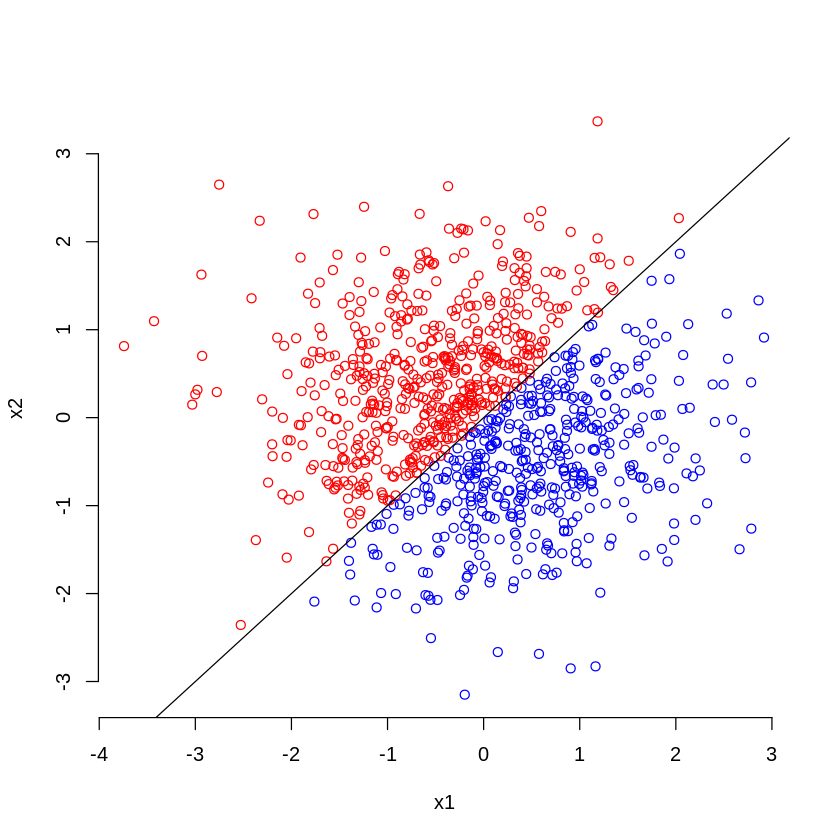

In [28]:
n <- 1000

x1 <- rnorm(n)
x2 <- rnorm(n)
y <- ifelse(x2 > x1, "red", "blue")

plot(x2 ~ x1, col=ifelse(y=="red", "red", "blue"), bty="n")
abline(a=0, b=1)

#### Answer to b

***Compute the cross-validation error rates for support vector classifiers with a range of `cost` values. How many training errors are misclassified for each value of `cost` considered, and how does this relate to the cross-validation errors obtained***

In [29]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [49]:
d <- data.frame("x1"=x1, "x2"=x2, "y"=as.factor(y))

train_p <- 0.8
train_n <- floor(n*train_p)
train_ind <- sample(1:n, train_n, replace=FALSE)

train_d <- d[train_ind,]
test_d <- d[-train_ind,]

In [75]:
costs <- c(0.001, 0.01, 0.1, 1, 3, 10, 100, 300, 1000)
linear_tune <- tune(svm, y~x2+x1, data=train_d, kernel="linear", ranges=list(cost=costs))
data.frame("Cost" = linear_tune$performances$cost,
           "Error" = linear_tune$performances$error,
           "Misclassification" = linear_tune$performances$error*train_n)

Cost,Error,Misclassification
<dbl>,<dbl>,<dbl>
1e-03,0.29875,239
1e-02,0.03750,30
1e-01,0.01750,14
1e+00,0.00000,0
3e+00,0.00000,0
1e+01,0.00125,1
1e+02,0.00000,0
3e+02,0.00000,0
1e+03,0.00125,1


#### Answer to c

***Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `cost` considered. Which value of `cost` leads to the fewest test errors, and how does this compare to the values of `cost` that yield the fewest training errors and the fewest cross-validation errors***

In [76]:
misclas <- rep(NA, length(costs))
for(i in 1:length(costs)){
  fit <- svm(y ~ x1 + x2, data=train_d, kernel="linear", cost = costs[i])
  preds <- predict(fit, test_d)
  misclas[i] <- sum(preds != test_d$y)
}
cbind("Cost"=costs, "Train Err"=linear_tune$performances$error, "Test Err"=misclas/(n-train_n))

Cost,Train Err,Test Err
1e-03,0.29875,0.235
1e-02,0.03750,0.025
1e-01,0.01750,0.005
1e+00,0.00000,0.000
3e+00,0.00000,0.000
1e+01,0.00125,0.000
1e+02,0.00000,0.000
3e+02,0.00000,0.000
1e+03,0.00125,0.000


#### Answer to d

***Discuss your results.***

The question's claim would have us find that high `cost` with low `error` on training data would result in high `error` for test data.  However, we do not find that here.